In [11]:
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [12]:
drugDataDF = pd.read_csv(("drug_deaths.csv"))
pd.set_option('display.max_columns', None)
drugDataDF.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,0,0,1,0.0,0,0,0,1,1,0,0,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,1,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [13]:
drugColDF = drugDataDF[['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'InjuryState', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'DeathCityGeo']]
drugColDF.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,InjuryState,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo
0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0,0,0,0,1,1,0,0,0,0,0,NaN,0,0,"CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,NaN,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,"Norwalk, CT\n(41.11805, -73.412906)"
2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Danbury, CT\n(41.393666, -73.451539)"
3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,1,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Greenwich, CT\n(41.026526, -73.628549)"
4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,NaN,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,"Greenwich, CT\n(41.026526, -73.628549)"


In [18]:
drugLocDF = drugColDF.loc[drugColDF["ResidenceState"] == "CT"]
drugLocDF = drugLocDF.loc[drugColDF["Sex"] != "Unknown"]
drugLocDF = drugLocDF.loc[drugColDF["Race"] != "Unknown"]

drugLocDF['Morphine_NotHeroin'] = drugLocDF['Morphine_NotHeroin'].str.replace('1ES', ' ')
drugLocDF['Morphine_NotHeroin'] = drugLocDF['Morphine_NotHeroin'].str.replace('STOLE MEDS', ' ')
drugLocDF['Fentanyl'] = drugLocDF['Fentanyl'].str.replace('1-A', ' ')

drugLocDF.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,InjuryState,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo
2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Danbury, CT\n(41.393666, -73.451539)"
13,15-0232,05/14/2015 12:00:00 AM,1.0,50.0,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"DANBURY, CT\n(41.393666, -73.451539)"
14,16-0028,01/13/2016 12:00:00 AM,0.0,29.0,Male,Black,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NaN,1,0,0,0.0,0,0,0,0,1,0,1,0,0,0,NaN,0,1,"NEW HAVEN, CT\n(41.308252, -72.924161)"
18,16-0065,01/30/2016 12:00:00 AM,0.0,54.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,NaN,1,0,0,0.0,0,0,1,0,0,0,0,0,0,0,NaN,0,1,"MIDDLETOWN, CT\n(41.544654, -72.651713)"
19,16-0889,12/20/2016 12:00:00 AM,0.0,32.0,Male,White,WINDHAM,WINDHAM,CT,WINDHAM,NaN,1,0,1,0.0,0,0,0,0,1,0,0,0,0,0,NaN,0,1,"Windham, CT\n(41.699744, -72.157703)"


In [19]:
drugLocDF.to_csv("drug_deaths_clean.csv")

In [20]:
Heroin = drugLocDF["Heroin"].sum()
Cocaine = drugLocDF["Cocaine"].sum()
Fentanyl = drugLocDF["Fentanyl"].sum()
Fentanyl_Analogue = drugLocDF["Fentanyl_Analogue"].sum()
Oxycodone = drugLocDF["Oxycodone"].sum()
Oxymorphone = drugLocDF["Oxymorphone"].sum()
Ethanol = drugLocDF["Ethanol"].sum()
Hydrocodone = drugLocDF["Hydrocodone"].sum()
Benzodiazepine = drugLocDF["Benzodiazepine"].sum()
Methadone = drugLocDF["Methadone"].sum()
Amphet = drugLocDF["Amphet"].sum()
Tramad = drugLocDF["Tramad"].sum()
Morphine_NotHeroin = drugLocDF["Morphine_NotHeroin"].sum()
Hydromorphone = drugLocDF["Hydromorphone"].sum()
OpiateNOS = drugLocDF["OpiateNOS"].sum()



drug_stats = pd.DataFrame({"Heroin":[Heroin],
                          "Cocaine":[Cocaine],
                          "Fentanyl":[Fentanyl],
                          "Oxycodone":[Oxycodone],
                          "Oxymorphone":[Oxymorphone],
                          "Ethanol":[Ethanol],
                          "Hydrocodone":[Hydrocodone],
                          "Benzodiazepine":[Benzodiazepine],
                          "Methadone":[Methadone],
                          "Amphet":[Amphet],
                          "Tramad":[Tramad],
                          "Morphine":[Morphine_NotHeroin],
                          "Hydromorphone":[Hydromorphone],
                          "OpiateNOS":[OpiateNOS],
                         })
drug_stats

,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine,Hydromorphone,OpiateNOS
0,1643,1022,0000101111011010010110100110100110111100101001...,345,31,901,66,992,324,124,93,000000000000000000000000000001000 000010000000...,21,82


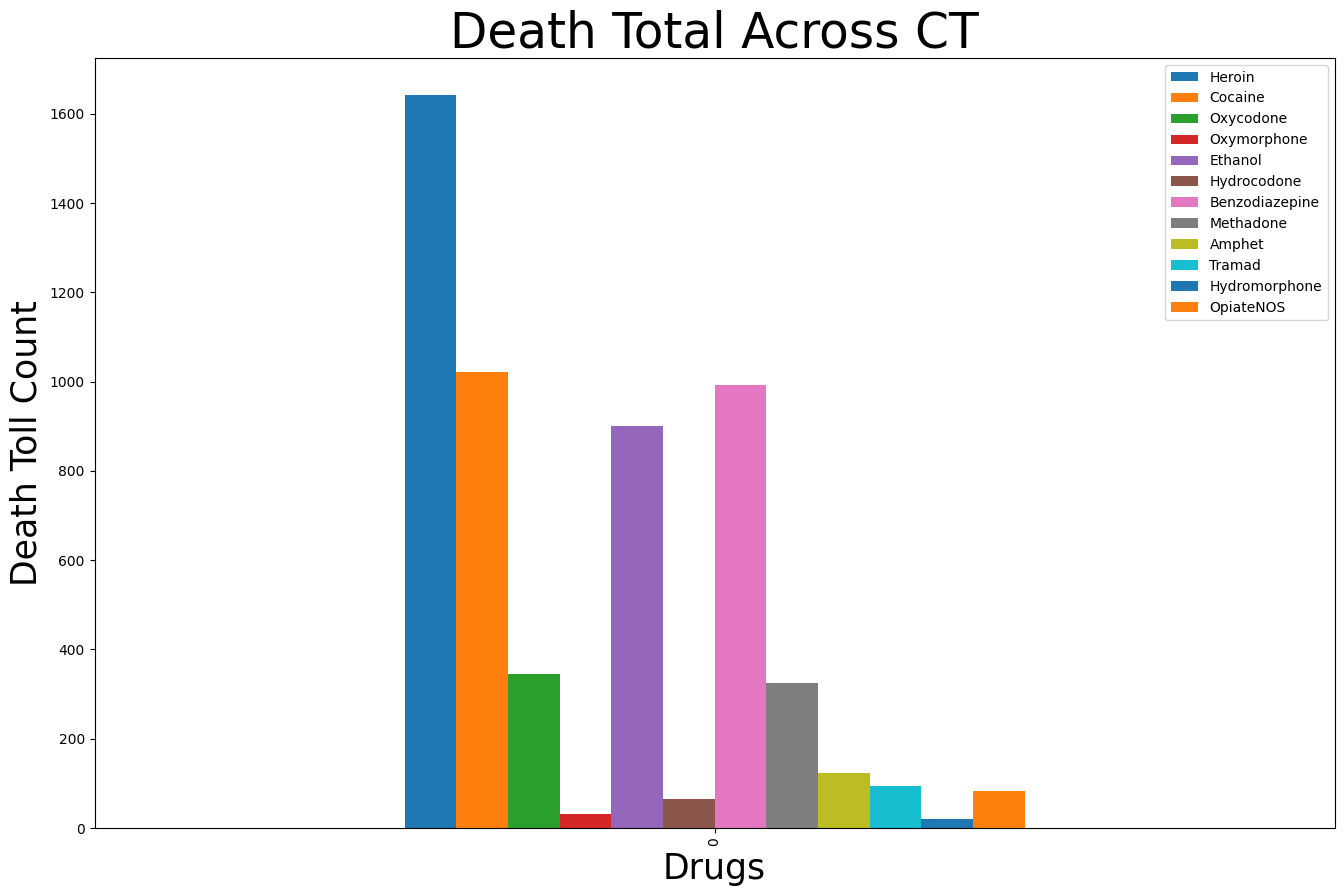

In [17]:

plot_pandas = drug_stats.plot(kind="bar", linewidth=1, figsize=(16, 10)) 
plt.xlabel("Drugs", fontsize = 25)
plt.ylabel("Death Toll Count", fontsize = 25)
plt.title("Death Total Across CT", fontsize = 35)

plt.show()

SyntaxError: invalid syntax (3528599804.py, line 1)